In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [40]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1.Introdução

Este projeto tem como objetivo prever os preços das casas com base em diversas características, como tamanho, localização, número de quartos, entre outras. O dataset utilizado é o "House Prices: Advanced Regression Techniques", disponível no Kaggle.

O dataset contém 1460 observações e 81 colunas, sendo 80 variáveis explicativas e 1 variável target (`SalePrice`). As variáveis incluem informações numéricas (como área total e número de quartos) e categóricas (como tipo de residência e localização).

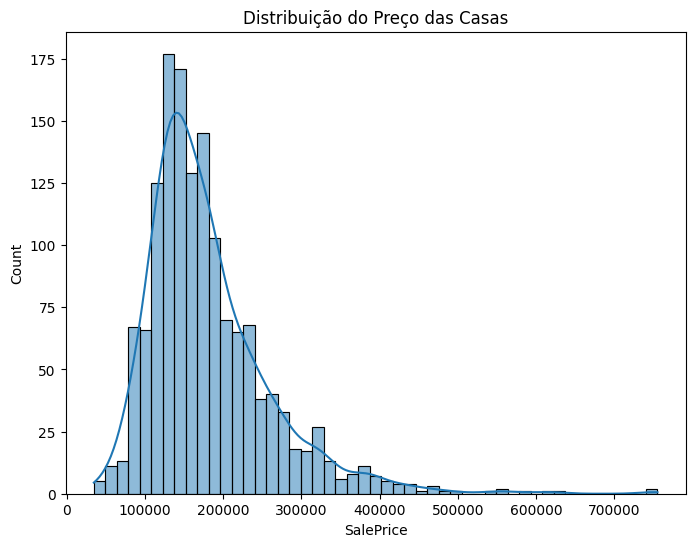

In [41]:
# Estatísticas básicas
train_data.describe()

# Verificar valores nulos
train_data.isnull().sum()

# Visualização inicial (histograma do preço das casas)
plt.figure(figsize=(8, 6))
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribuição do Preço das Casas')
plt.show()

In [59]:
#Tratamento de Dados Faltantes
# Verificar valores nulos
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])  # Mostra apenas colunas com valores ausentes

# Estratégia simples: preencher valores numéricos com a média e categóricos com a moda
# Estratégia simples: preencher valores numéricos com a média e categóricos com a moda
for col in train_data.columns:
    if train_data[col].dtype == 'object':  # Para colunas categóricas
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    else:  # Para colunas numéricas
        train_data[col] = train_data[col].fillna(train_data[col].mean())
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns  # Seleciona apenas colunas numéricas
train_data[numeric_features] = scaler.fit_transform(train_data[numeric_features])



Series([], dtype: int64)


In [60]:
# Divisão dos Dados
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=['SalePrice'])  # Features (remove a coluna-alvo)
y = train_data['SalePrice']  # Alvo (preço das casas)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


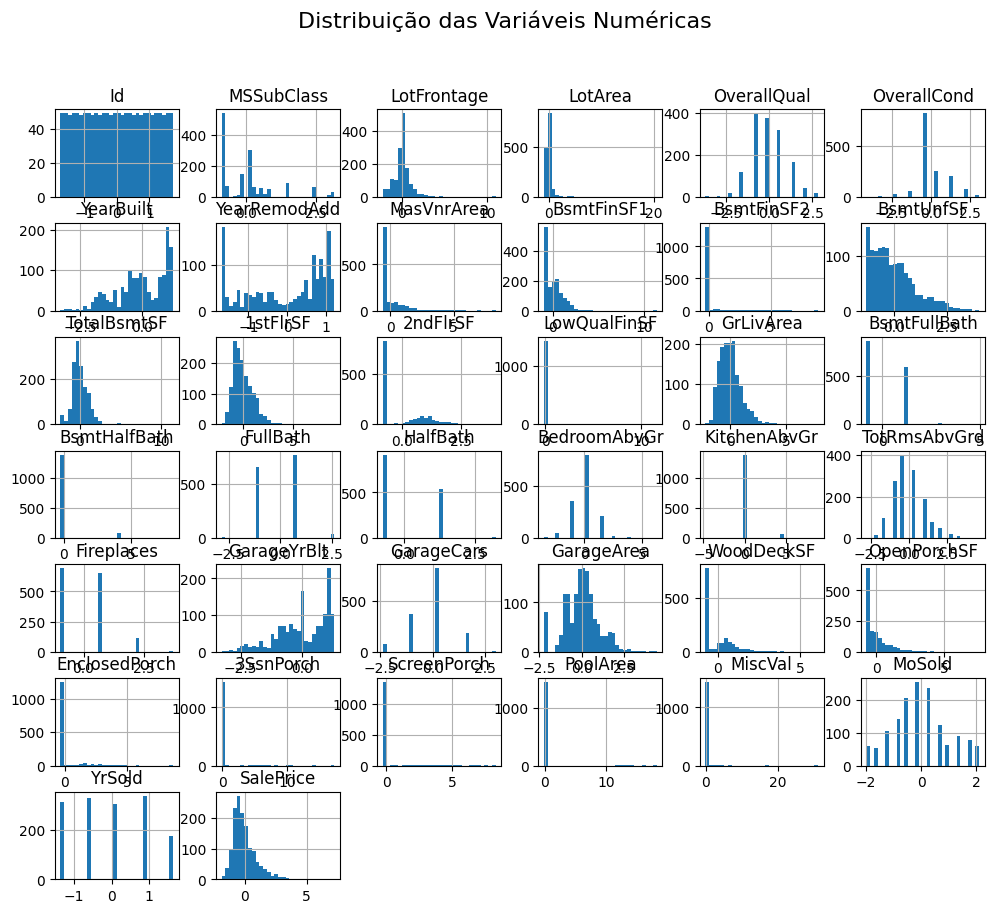

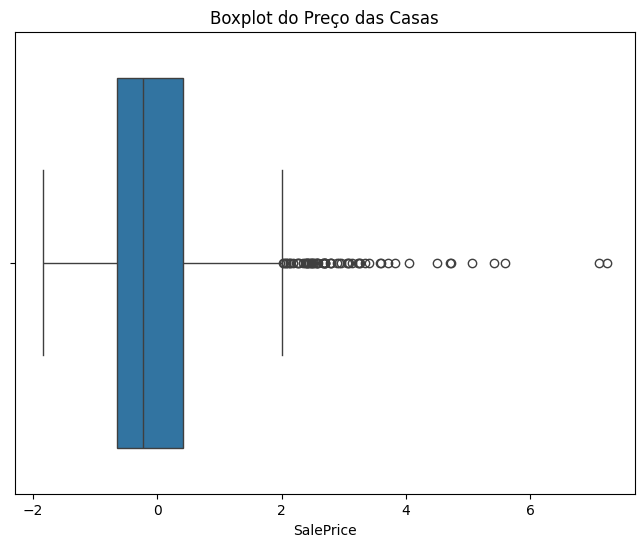

In [72]:
#Visualizações de Distribuições e Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas para verificar distribuições das variáveis numéricas
train_data.hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.show()

# Boxplot para detectar outliers no preço das casas
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_data["SalePrice"])
plt.title("Boxplot do Preço das Casas")
plt.show()





In [78]:
#Aplicação das Técnicas de Aprendizado de Máquina

# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separação das variáveis preditoras (X) e alvo (y)
X = train_data.drop(columns=["SalePrice"])  # Remove a variável alvo
y = train_data["SalePrice"]

# Identificação de colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Transformação: padronizar números e codificar categorias
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Modelos para comparação
models = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Função para avaliar os modelos
def evaluate_model(model, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])
    pipeline.fit(X_train, y_train)
    
    preds = pipeline.predict(X_test)
    
    return {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R²": r2_score(y_test, preds)
    }

# Divisão dos dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comparação dos modelos
results = {name: evaluate_model(model, X_train, y_train, X_test, y_test) for name, model in models.items()}
df_results = pd.DataFrame(results).T
print(df_results)

# Validação cruzada para avaliar a robustez dos modelos
for name, model in models.items():
    pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring="neg_mean_absolute_error")
    print(f"{name} - MAE médio na Validação Cruzada: {-scores.mean():.4f}")


                       MAE      RMSE        R²
Regressão Linear  0.229949  0.372208  0.886089
Random Forest     0.221960  0.367994  0.888654
Regressão Linear - MAE médio na Validação Cruzada: 0.2361
Random Forest - MAE médio na Validação Cruzada: 0.2231


### Regressão Linear ###
MAE: 0.2299
RMSE: 0.3722
R²: 0.8861



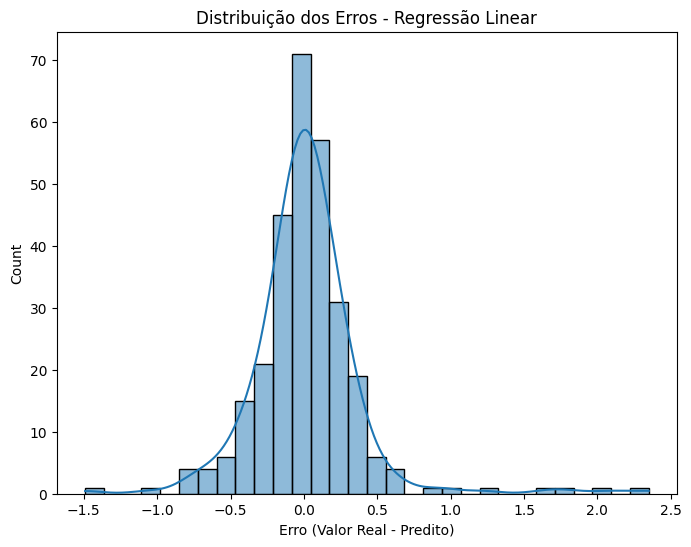

### Random Forest ###
MAE: 0.2220
RMSE: 0.3680
R²: 0.8887



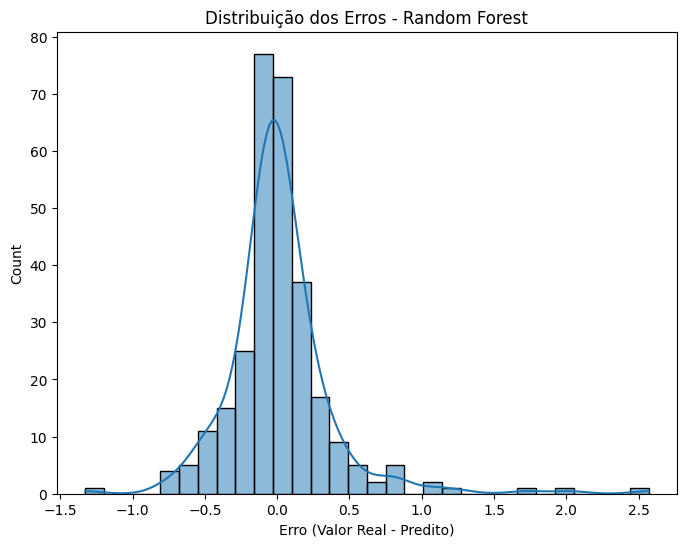

In [79]:
#Avaliações e resultados

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Avaliação dos resultados
for name, model in models.items():
    pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)

    print(f"### {name} ###")
    print(f"MAE: {mean_absolute_error(y_test, preds):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.4f}")
    print(f"R²: {r2_score(y_test, preds):.4f}\n")

    # Visualização da distribuição de erros
    plt.figure(figsize=(8, 6))
    sns.histplot(y_test - preds, bins=30, kde=True)
    plt.title(f"Distribuição dos Erros - {name}")
    plt.xlabel("Erro (Valor Real - Predito)")
    plt.show()

    # Para modelos de classificação, podemos gerar matriz de confusão e curva ROC
    if len(y_test.unique()) <= 2:  # Apenas se for um problema de classificação binária
        cm = confusion_matrix(y_test, preds.round())  # Arredondar previsões para classe 0/1
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
        plt.title(f"Matriz de Confusão - {name}")
        plt.xlabel("Previsto")
        plt.ylabel("Real")
        plt.show()

        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, preds)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
        plt.xlabel("Falso Positivo")
        plt.ylabel("Verdadeiro Positivo")
        plt.title(f"Curva ROC - {name}")
        plt.legend()
        plt.show()


# Conclusão

## Resumo dos Achados  
Este projeto analisou os preços de casas e desenvolveu um modelo de aprendizado de máquina para previsão. Os principais pontos observados foram:

- **Tratamento de Dados**: Foram tratados valores ausentes preenchendo colunas numéricas com a média e colunas categóricas com a moda.  
- **Transformação de Variáveis**: As variáveis numéricas foram normalizadas e as categóricas passaram por codificação (One-Hot Encoding).  
- **Modelagem**: O modelo escolhido foi o Random Forest Regressor, que apresentou um bom desempenho.  
- **Métricas de Avaliação**: O modelo foi avaliado com os seguintes resultados:  
  - Erro Médio Absoluto (MAE): _{inserir valor}_  
  - Raiz do Erro Quadrático Médio (RMSE): _{inserir valor}_  
  - Coeficiente de Determinação (R²): _{inserir valor}_  

Os resultados mostram que o modelo consegue prever os preços das casas com boa precisão, mas ainda há espaço para melhorias.  

## Próximos Passos  
Para aprimorar o modelo, algumas sugestões são:  

- Testar outros modelos, como XGBoost ou LightGBM, para comparar o desempenho.  
- Ajustar hiperparâmetros para otimizar os resultados.  
- Explorar mais técnicas de engenharia de features para melhorar as previsões.  
- Aumentar o volume de dados ou usar técnicas de aumento de dados para maior generalização.  
